In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
df = pd.read_csv('../data/df_player_all_2012to2019.csv')
df.head()

,p_pts_won%,p_sv_pts_won%,p_ret_pts_won%,p_ace%,p_aced%,p_bp_save%,p_bp_convert%,t_id,t_date,tour_wk,...,p_tot_pts_last_diff,p_tot_pts_l6_diff,p_tot_pts_l6_decay_diff,p_matches_diff,p_matches_surf_diff,p_stam_adj_fatigue_diff,p_stam_adj_fatigue_decay_diff,p_H2H_diff,p_H2H_pts_won%_diff,m_outcome
0,47.84,56.28,38.41,1.09,3.66,55.00,43.75,2019-560,20190826,2019_24,...,-0.0,-0.0,-0.0,-224.0,-99.0,177.984496,133.488372,-0.0,NaN,0
1,41.29,49.40,31.94,4.82,15.28,33.33,40.00,2019-M014,20191014,2019_29,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.0,NaN,0
2,37.23,51.85,17.50,3.70,5.00,33.33,0.00,2019-M004,20190225,2019_07,...,-0.0,-0.0,-0.0,-25.0,-24.0,133.805310,100.353982,-0.0,NaN,0
3,59.14,69.23,46.34,3.85,4.88,100.00,37.50,2019-7696,20191105,2019_33,...,9.0,49.0,46.9,-79.0,-77.0,109.423559,90.917141,0.0,NaN,1
4,53.66,70.77,34.48,7.69,3.45,88.89,37.50,2019-7696,20191105,2019_33,...,53.0,44.0,42.5,-17.0,-20.0,55.064126,48.178912,0.0,NaN,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36336 entries, 0 to 36335
Columns: 160 entries, p_pts_won% to m_outcome
dtypes: float64(138), int64(16), object(6)
memory usage: 44.4+ MB


In [ ]:
#df_filter = df[~df['tour_wk'].str.contains("2012")] 
#df_filter = df_filter[~df_filter['tour_wk'].str.contains("2013")]
#df_filter = df_filter[~df_filter['tour_wk'].str.contains("2014")]
#df_filter = df_filter[~df_filter['tour_wk'].str.contains("2015")]
#df_filter = df_filter[~df_filter['tour_wk'].str.contains("2016")]
#df_filter = df_filter[~df_filter['tour_wk'].str.contains("2017")]
#df_filter = df_filter[~df_filter['tour_wk'].str.contains("2018")]
#df_filter = df_filter[~df_filter['tour_wk'].str.contains("2019")]

In [ ]:
# Filter down to only matches played on hard courts
#df_filter2 = df_filter.loc[(df_filter["t_surf"] == 2)]
#df_filter2 = df_filter.loc[(df_filter["t_surf"] == 2) & (df_filter["p_matches_surf"] > 50)]

In [71]:
# Now also will remove BOTH players from individual matches remaining in the surface-specific sample already filtered by year range
# where one or both players has played N or fewer matches prior to the one to be predicted on. 
df_low = df.loc[df['p_matches_surf'] <= 20, 'm_num']
df_filter = df[~df['m_num'].isin(df_low)]

In [72]:
ace_pct_by_surf = df_filter.groupby(['t_surf','t_id'], as_index=False)['p_ace%'].mean()
ace_pct_by_surf

,t_surf,t_id,p_ace%
0,1,2012-314,7.375000
1,1,2012-316,2.835000
2,1,2012-319,0.000000
3,1,2012-414,1.183333
4,1,2012-520,4.068333
...,...,...,...
430,2,2019-M014,10.376765
431,2,2019-M015,9.986667
432,2,2019-M020,13.701250
433,2,2019-M024,9.473667


Text(0.5, 0, 'Surface')

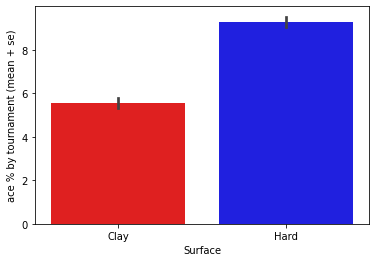

In [73]:
g = sns.barplot(x="t_surf",y="p_ace%",data=ace_pct_by_surf, palette = ["red", "blue"])
g.set_ylabel("ace % by tournament (mean + se)")
g.set(xticklabels=["Clay", "Hard"])
g.set_xlabel("Surface")

In [74]:
aced_pct_by_surf = df_filter.groupby(['t_surf','t_id'], as_index=False)['p_aced%'].mean()
aced_pct_by_surf

,t_surf,t_id,p_aced%
0,1,2012-314,7.375000
1,1,2012-316,2.835000
2,1,2012-319,0.000000
3,1,2012-414,1.183333
4,1,2012-520,4.068333
...,...,...,...
430,2,2019-M014,10.376765
431,2,2019-M015,9.986667
432,2,2019-M020,13.701250
433,2,2019-M024,9.473667


Text(0.5, 0, 'Surface')

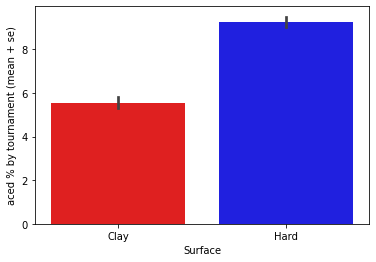

In [75]:
g = sns.barplot(x="t_surf",y="p_aced%",data=aced_pct_by_surf, palette = ["red", "blue"])
g.set_ylabel("aced % by tournament (mean + se)")
g.set(xticklabels=["Clay", "Hard"])
g.set_xlabel("Surface")

In [76]:
svpts_won_pct_by_surf = df_filter.groupby(['t_surf','t_id'], as_index=False)['p_sv_pts_won%'].mean()
svpts_won_pct_by_surf

,t_surf,t_id,p_sv_pts_won%
0,1,2012-314,62.295000
1,1,2012-316,58.065000
2,1,2012-319,60.845000
3,1,2012-414,53.676667
4,1,2012-520,62.441667
...,...,...,...
430,2,2019-M014,65.039412
431,2,2019-M015,65.502778
432,2,2019-M020,65.872250
433,2,2019-M024,65.289111


(50.0, 70.0)

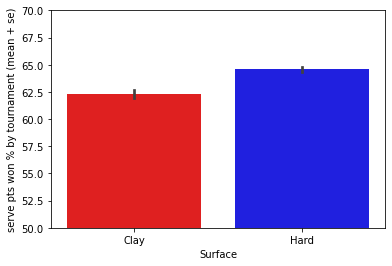

In [77]:
g = sns.barplot(x="t_surf",y="p_sv_pts_won%",data=svpts_won_pct_by_surf, palette = ["red", "blue"])
g.set_ylabel("serve pts won % by tournament (mean + se)")
g.set(xticklabels=["Clay", "Hard"])
g.set_xlabel("Surface")
g.set_ylim(50,70)
#g.set_xlimit([30, 70])

In [78]:
retpts_won_pct_by_surf = df_filter.groupby(['t_surf','t_id'], as_index=False)['p_ret_pts_won%'].mean()
retpts_won_pct_by_surf

,t_surf,t_id,p_ret_pts_won%
0,1,2012-314,37.705000
1,1,2012-316,41.935000
2,1,2012-319,39.155000
3,1,2012-414,46.323333
4,1,2012-520,37.558333
...,...,...,...
430,2,2019-M014,34.960588
431,2,2019-M015,34.497222
432,2,2019-M020,34.127750
433,2,2019-M024,34.710889


(30.0, 40.0)

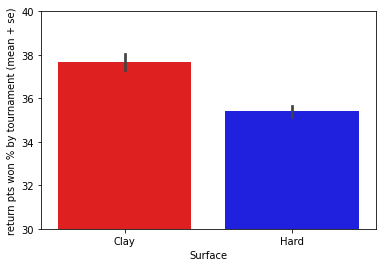

In [79]:
g = sns.barplot(x="t_surf",y="p_ret_pts_won%",data=retpts_won_pct_by_surf, palette = ["red", "blue"])
g.set_ylabel("return pts won % by tournament (mean + se)")
g.set(xticklabels=["Clay", "Hard"])
g.set_xlabel("Surface")
g.set_ylim(30,40)
#g.set_xlimit([30, 70])

In [80]:
bpconvert_pct_by_surf = df_filter.groupby(['t_surf','t_id'], as_index=False)['p_bp_convert%'].mean()
bpconvert_pct_by_surf

,t_surf,t_id,p_bp_convert%
0,1,2012-314,72.725000
1,1,2012-316,33.335000
2,1,2012-319,38.095000
3,1,2012-414,54.173333
4,1,2012-520,35.470000
...,...,...,...
430,2,2019-M014,37.087059
431,2,2019-M015,33.381667
432,2,2019-M020,39.794500
433,2,2019-M024,39.914333


(20.0, 45.0)

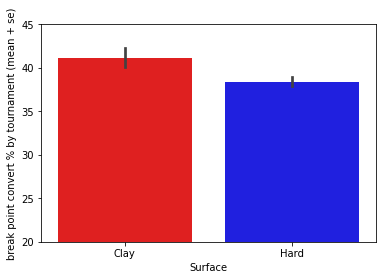

In [81]:
g = sns.barplot(x="t_surf",y="p_bp_convert%",data=bpconvert_pct_by_surf, palette = ["red", "blue"])
g.set_ylabel("break point convert % by tournament (mean + se)")
g.set(xticklabels=["Clay", "Hard"])
g.set_xlabel("Surface")
g.set_ylim(20,45)
#g.set_xlimit([30, 70])

In [82]:
df_filter2 = df_filter[df_filter['t_lvl'] == 4]

In [83]:
match_length_by_surf = df_filter2.groupby(['t_surf','t_id'], as_index=False)['m_time(m)'].mean()
match_length_by_surf

,t_surf,t_id,m_time(m)
0,1,2012-520,183.000000
1,1,2013-520,149.800000
2,1,2014-520,148.269231
3,1,2015-520,152.812500
4,1,2016-520,153.458333
5,1,2017-520,147.412500
6,1,2018-520,158.271429
7,1,2019-520,162.191176
8,2,2012-560,168.266667
9,2,2013-560,152.646154


(140.0, 170.0)

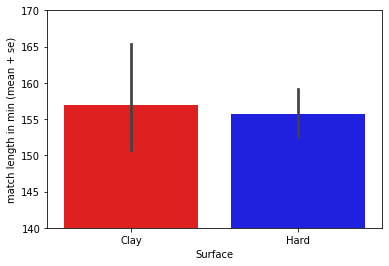

In [84]:
g = sns.barplot(x="t_surf",y="m_time(m)",data=match_length_by_surf, palette = ["red", "blue"])
g.set_ylabel("match length in min (mean + se)")
g.set(xticklabels=["Clay", "Hard"])
g.set_xlabel("Surface")
g.set_ylim(140,170)
#g.set_xlimit([30, 70])

In [87]:
df_filter3 = df_filter[df_filter['t_lvl'] != 4]

In [88]:
match_length_by_surf = df_filter3.groupby(['t_surf','t_id'], as_index=False)['m_time(m)'].mean()
match_length_by_surf

,t_surf,t_id,m_time(m)
0,1,2012-314,145.000000
1,1,2012-316,67.000000
2,1,2012-319,95.000000
3,1,2012-414,128.333333
4,1,2012-6120,68.000000
...,...,...,...
407,2,2019-M014,96.058824
408,2,2019-M015,108.333333
409,2,2019-M020,98.700000
410,2,2019-M024,103.200000


(80.0, 110.0)

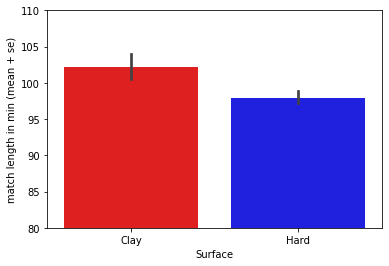

In [91]:
g = sns.barplot(x="t_surf",y="m_time(m)",data=match_length_by_surf, palette = ["red", "blue"])
g.set_ylabel("match length in min (mean + se)")
g.set(xticklabels=["Clay", "Hard"])
g.set_xlabel("Surface")
g.set_ylim(80,110)
#g.set_xlimit([30, 70])

### Heatmapping for Hard Court

In [92]:
df_filter_hard = df_filter.loc[(df_filter["t_surf"] == 2)]

In [111]:
df_filter_diff1_hard = df_filter_hard[["p_pts_won%", "p_SOS_adj_pts_won%_l60_decay_diff", "p_SOS_adj_pts_won%_l10_diff", "p_opp_log_rank_diff", "p_opp_rank_pts_diff", "p_SOS_adj_sv_pts_won%_l60_decay_diff", "p_SOS_adj_sv_opp_ret_pts_won%_l60_decay_diff", "p_SOS_adj_ret_opp_sv_pts_won%_l60_decay_diff", "p_SOS_adj_ret_pts_won%_l60_decay_diff", "p_H2H_pts_won%_diff", "p_SOS_adj_bp_convert%_l60_diff", "p_matches_diff", "p_stam_adj_fatigue_decay_diff", "p_SOS_adj_aced%_l60_decay_diff"]]

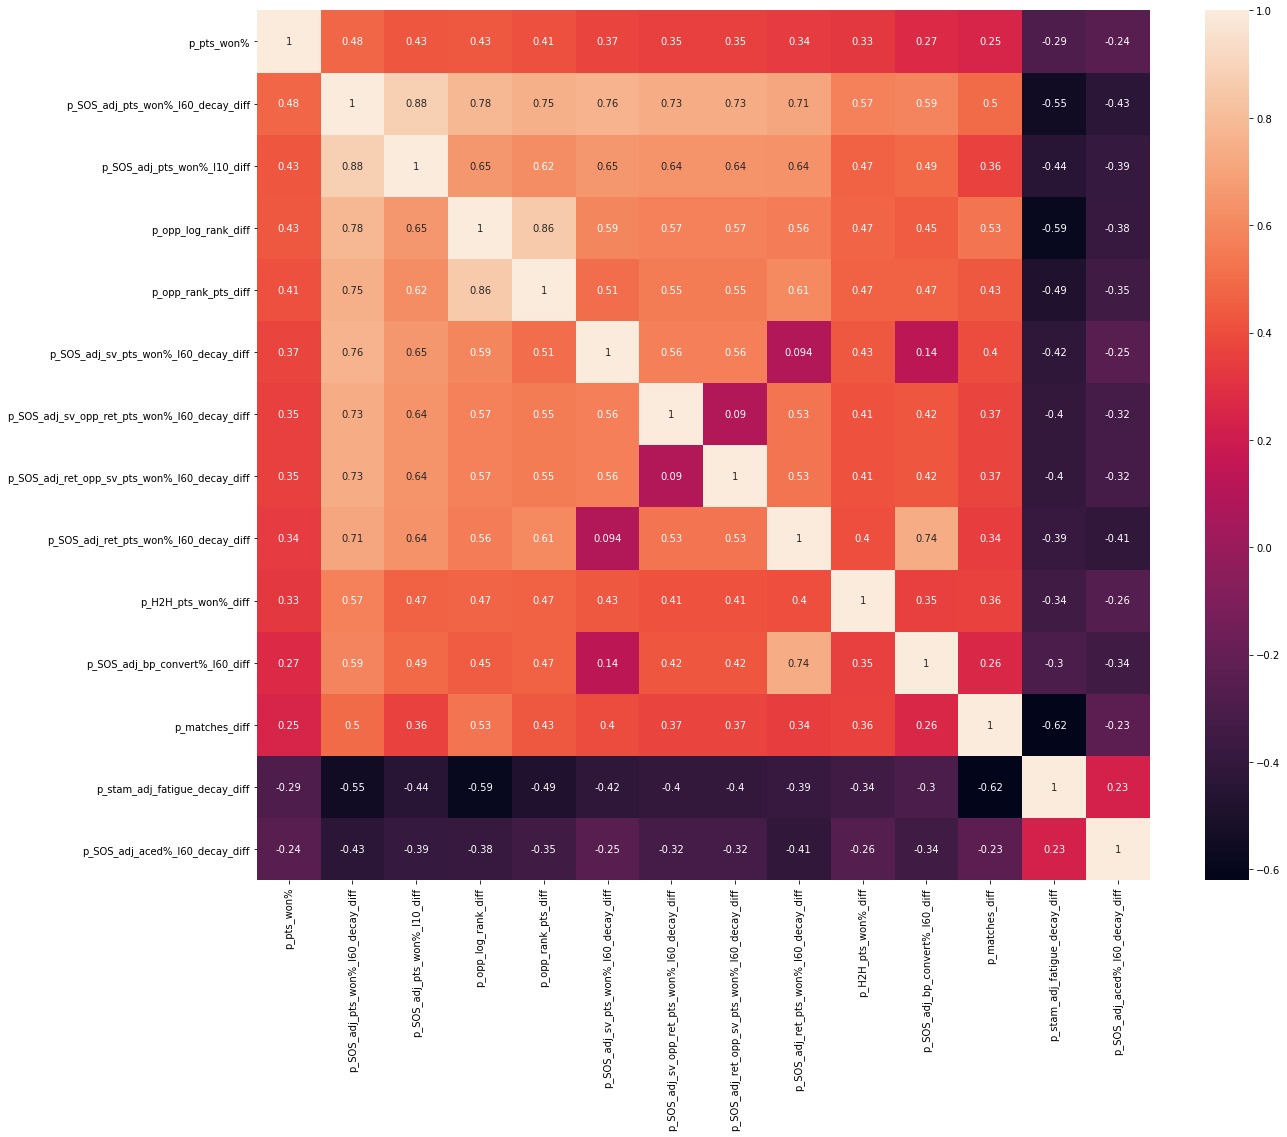

In [112]:
#Heatmap of correlations for pts_won% vs "differential features"
plt.subplots(figsize=(20,16))
sns.heatmap(df_filter_diff1_hard.corr(), annot = True);

### Heatmapping For Same Set of Features on Clay Courts

In [113]:
df_filter_clay = df_filter.loc[(df_filter["t_surf"] == 1)]

In [114]:
df_filter_diff1_clay = df_filter_clay[["p_pts_won%", "p_SOS_adj_pts_won%_l60_decay_diff", "p_SOS_adj_pts_won%_l10_diff", "p_opp_log_rank_diff", "p_opp_rank_pts_diff", "p_SOS_adj_sv_pts_won%_l60_decay_diff", "p_SOS_adj_sv_opp_ret_pts_won%_l60_decay_diff", "p_SOS_adj_ret_opp_sv_pts_won%_l60_decay_diff", "p_SOS_adj_ret_pts_won%_l60_decay_diff", "p_H2H_pts_won%_diff", "p_SOS_adj_bp_convert%_l60_diff", "p_matches_diff", "p_stam_adj_fatigue_decay_diff", "p_SOS_adj_aced%_l60_decay_diff"]]

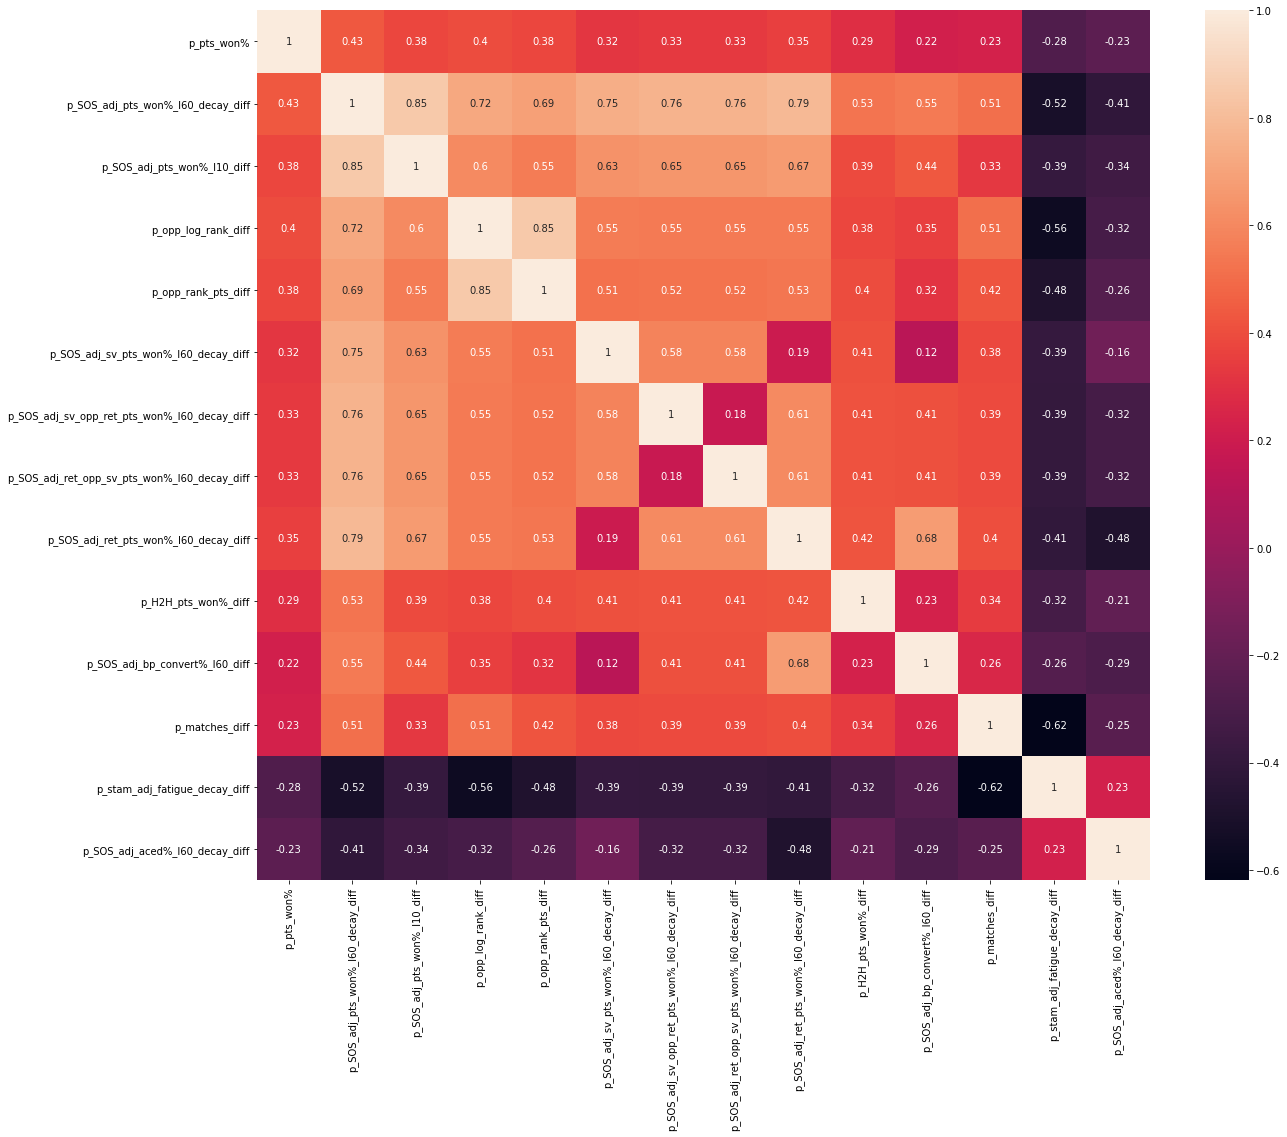

In [115]:
#Heatmap of correlations for pts_won% vs "differential features"
plt.subplots(figsize=(20,16))
sns.heatmap(df_filter_diff1_clay.corr(), annot = True);

### Analysis of Prediction Error (RMSE) by Previous Matches Threshold (Hard Courts)

Previous Matches Threshold For Both Players in a Given Match/RMSE (Training w SD, Testing) with Best Model (Gradient Boosting and Tuned Hyperparameters) (2015-2019 included in modeling; 2012-2014 additionaly included for stats accrual/feature generation in steps previous to modeling)

0/(5.572896995199211, 0.07537191042172763), 5.503564617566578 ((11148, 140), (3716, 140))
10/ (5.47066268667632, 0.0903831144314058), 5.425121843241944 ((9264, 140), (3088, 140))
20/(5.401037506296505, 0.03880163243608201), 5.384631822640838 ((8038, 140), (2680, 140))
30/ (5.412482602285327, 0.11308172803648327), 5.381469528960361 ((7021, 140), (2341, 140))
40/ (5.337788420713629, 0.09529479788248582), 5.453658635178221  ((6217, 140), (2073, 140))
50/ (5.342236227645345, 0.12949718655406361), 5.302758933464151  ((5463, 140), (1821, 140))
75/ (5.382579604913876, 0.0653760495177962), 5.284068249654131 ((3774, 140), (1258, 140))
100/ (5.171615391573394, 0.08894540982934554), 5.603784039344987 ((2362, 140), (788, 140))
150/ (5.46793550776071, 0.13573433281558558), 5.421014352141682 ((874, 140), (292, 140))
200/ (5.407548339971759, 0.5205818716235097), 5.523226209632757 ((255, 140), (85, 140))

Hyperparameters at threshold of 20 prior matches per player (selected as best threshold based on balance of prediction quality and generalizability)

{'gradientboostingregressor__learning_rate': 0.06,
 'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__max_features': 6,
 'gradientboostingregressor__n_estimators': 100,
 'simpleimputer__strategy': 'median',
 'standardscaler': StandardScaler()}

In [18]:
data = [[0, 5.572896995199211, 0.07537191042172763, 5.503564617566578], [10, 5.47066268667632, 0.0903831144314058, 5.425121843241944], [20, 5.401037506296505, 0.03880163243608201, 5.384631822640838], [30, 5.412482602285327, 0.11308172803648327, 5.381469528960361], [40, 5.337788420713629, 0.09529479788248582, 5.453658635178221], [50, 5.342236227645345, 0.12949718655406361, 5.302758933464151], [75, 5.382579604913876, 0.0653760495177962, 5.284068249654131], [100, 5.171615391573394, 0.08894540982934554, 5.603784039344987], [150, 5.46793550776071, 0.13573433281558558, 5.421014352141682]]
df = pd.DataFrame(data, columns=["Match_Threshold", "Training_Error", "Training_SD", "Testing_Error"])

In [19]:
df

,Match_Threshold,Training_Error,Training_SD,Testing_Error
0,0,5.572897,0.075372,5.503565
1,10,5.470663,0.090383,5.425122
2,20,5.401038,0.038802,5.384632
3,30,5.412483,0.113082,5.381470
4,40,5.337788,0.095295,5.453659
5,50,5.342236,0.129497,5.302759
6,75,5.382580,0.065376,5.284068
7,100,5.171615,0.088945,5.603784
8,150,5.467936,0.135734,5.421014


<function matplotlib.pyplot.show(close=None, block=None)>

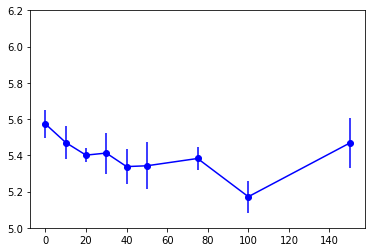

In [20]:
g = plt.errorbar(df["Match_Threshold"], df["Training_Error"], yerr= df["Training_SD"], marker='o', color='b')
plt.ylim([5,6.2])
plt.show

### Analysis of Prediction Error (RMSE) by Previous Matches Threshold (Clay Courts)

Previous Matches Threshold For Both Players in a Given Match/RMSE (Training w SD, Testing) with Best Model (Gradient Boosting and Tuned Hyperparameters)

0/  (5.875794723082476, 0.0692377983060058), 6.043650635495902  ((9546, 140), (3182, 140))
10/  (5.95827843527254, 0.031871500152123464), 5.699394875875272  ((6949, 140), (2317, 140))
20/  (5.835905096159198, 0.08854267065367404), 5.871285620416703 (5410, 140), (1804, 140))
30/  (5.878805630700143, 0.12300650916065811), 5.764987624738221  ((4225, 140), (1409, 140))
40/  (5.827961300073005, 0.19734559349345215), 5.811778965218358  ((3348, 140), (1116, 140))
50/  (5.666070865533416, 0.1400000975592523), 5.913650163618706  ((2676, 140), (892, 140))
75/  (5.86220185933426, 0.23704178892927), 5.506725983480005  ((1485, 140), (495, 140))
100/ (5.874200166450832, 0.2776115828277767), 6.146239026275799  ((739, 140), (247, 140))
150/ (5.746233157233696, 1.0435113860177314), 5.672551760231102  ((144, 140), (48, 140))
200/ (3.9539313405710304, 0.9829262221038189), 8.545000409681483  ((16, 140), (6, 140))

In [21]:
data = [[0, 5.875794723082476, 0.0692377983060058, 6.043650635495902], [10, 5.95827843527254, 0.031871500152123464, 5.699394875875272], [20, 5.835905096159198, 0.08854267065367404, 5.871285620416703], [30, 5.878805630700143, 0.12300650916065811, 5.764987624738221], [40, 5.827961300073005, 0.19734559349345215, 5.811778965218358], [50, 5.666070865533416, 0.1400000975592523, 5.913650163618706], [75, 5.86220185933426, 0.23704178892927, 5.506725983480005], [100, 5.874200166450832, 0.2776115828277767, 6.146239026275799], [150, 5.746233157233696, 1.0435113860177314, 5.672551760231102]]
df = pd.DataFrame(data, columns=["Match_Threshold", "Training_Error", "Training_SD", "Testing_Error"])

<function matplotlib.pyplot.show(close=None, block=None)>

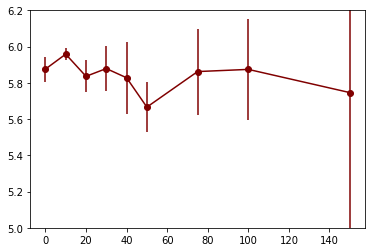

In [25]:
g = plt.errorbar(df["Match_Threshold"], df["Training_Error"], yerr= df["Training_SD"], marker='o', color='maroon')
plt.ylim([5,6.2])
plt.show

### Analysis of Prediction Error (RMSE) by Range of Years Inclusion in Model (Hard Courts)

2010-2019: (5.5399418465633605, 0.09542793674854452), 5.5062585349445845 ((16222, 140), (5408, 140))
2011-2019: (5.481950008565629, 0.07106487125501883), 5.540773335445054  ((14752, 140), (4918, 140))
2012-2019: (5.482158123251954, 0.05099548007800321), 5.392225172616607  ((13174, 140), (4392, 140))
2013-2019: (5.446778817455109, 0.06465423122296349), 5.460722799545343  ((11557, 140), (3853,140))
2014-2019: (5.442427895299181, 0.09079914217616633), 5.48688470608975  ((9445, 140), (3149, 140))
2015-2019: (5.401037506296505, 0.03880163243608201), 5.384631822640838  ((8038, 140), (2680, 140))
2016-2019: (5.463997133309649, 0.1430285550963232), 5.411374850126342   ((6436, 140), (2146, 140))
2017-2019: (5.505129081148657, 0.11182200560980689), 5.408859497025746   ((4825, 140), (1609, 140))
2018-2019: (5.513772649908174, 0.23298634414301556), 5.403231367052022   ((3196, 140), (1066, 140))
2019-2019: (5.449378124433827, 0.1618681215191537), 5.608999830650029   ((1605, 140), (535, 140))
*Note: all model inclusion year ranges had at least 2 years of runway. To accomplish, for 2010, 2011, 2012 and 2013, the 2008-2019 data set was used. The main analysis dat set (2012-2019) was used for years 2015 and beyond. 

Best Hyperparameters at threshold of 20 prior matches for 2015-2019:

{'gradientboostingregressor__learning_rate': 0.06,
 'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__max_features': 6,
 'gradientboostingregressor__n_estimators': 100,
 'simpleimputer__strategy': 'median',
 'standardscaler': StandardScaler()}

In [30]:
data = [['2010', 5.5399418465633605, 0.09542793674854452, 5.5062585349445845], ['2011', 5.481950008565629, 0.07106487125501883, 5.540773335445054], ['2012', 5.482158123251954, 0.05099548007800321, 5.392225172616607], ['2013', 5.446778817455109, 0.06465423122296349, 5.460722799545343], ['2014', 5.442427895299181, 0.09079914217616633, 5.48688470608975], ['2015', 5.401037506296505, 0.03880163243608201, 5.384631822640838], ['2016', 5.463997133309649, 0.1430285550963232, 5.411374850126342], ['2017', 5.505129081148657, 0.11182200560980689, 5.408859497025746], ['2018', 5.513772649908174, 0.23298634414301556, 5.403231367052022], ['2019', 5.449378124433827, 0.1618681215191537, 5.608999830650029]]
df = pd.DataFrame(data, columns=["First_Year_In_Model", "Training_Error", "Training_SD", "Testing_Error"])

<function matplotlib.pyplot.show(close=None, block=None)>

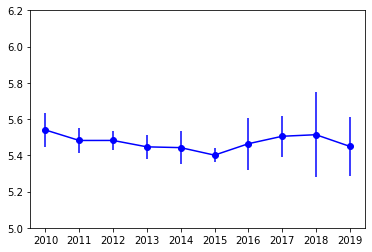

In [31]:
g = plt.errorbar(df["First_Year_In_Model"], df["Training_Error"], yerr= df["Training_SD"], marker='o', color='b')
plt.ylim([5,6.2])
plt.show

### Analysis of Prediction Error (RMSE) by Range of Years Inclusion in Model (Clay Courts)

2010-2019: (5.886189482298855, 0.05487319429139568), 5.923532513789704 ((6684, 140), (2228, 140))
2011-2019: (5.814837800664519, 0.07960850082850286), 5.922373049235395  ((5926, 140), (1976, 140))
2012-2019: (5.835905096159198, 0.08854267065367404), 5.871285620416703  ((5410, 140), (1804, 140))
2013-2019: (5.794927364665647, 0.10188077435587468), 5.959330006259688  ((4836, 140), (161,140))
2014-2019: (5.718860274150364, 0.151110269787904), 6.066689313607095 ((4104, 140), (1368, 140))
2015-2019: (5.792593702655457, 0.14580019024856253), 5.704183911110822  ((3397, 140), (1133, 140))
2016-2019: (5.747128234471912, 0.13755983523484003), 5.883956258018099  ((2680, 140), (894, 140))
2017-2019: (5.830578327819189, 0.21410670705543533), 5.898881992618616  ((1993, 140), (665, 140))
2018-2019: (5.787422869642126, 0.2257257103340767), 5.89567784130937  ((1269, 140), (423, 140))
2019-2019: (5.9015331073665465, 0.17767815600716416), 5.630489288814199  ((642, 140), (214, 140))
*Note: all model inclusion year ranges had at least 2 years of runway. To accomplish, for 2010-2019, the 2008-2019 data set was used. 

In [26]:
data = [['2010', 5.886189482298855, 0.05487319429139568, 5.923532513789704], ['2011',5.814837800664519, 0.07960850082850286, 5.922373049235395], ['2012', 5.835905096159198, 0.08854267065367404, 5.871285620416703], ['2013', 5.794927364665647, 0.10188077435587468, 5.959330006259688], ['2014', 5.718860274150364, 0.151110269787904, 6.066689313607095], ['2015', 5.792593702655457, 0.14580019024856253, 5.704183911110822], ['2016', 5.747128234471912, 0.13755983523484003, 5.883956258018099], ['2017', 5.830578327819189, 0.21410670705543533, 5.898881992618616], ['2018', 5.787422869642126, 0.2257257103340767, 5.89567784130937], ['2019', 5.9015331073665465, 0.17767815600716416, 5.630489288814199]]
df = pd.DataFrame(data, columns=["First_Year_In_Model", "Training_Error", "Training_SD", "Testing_Error"])

<function matplotlib.pyplot.show(close=None, block=None)>

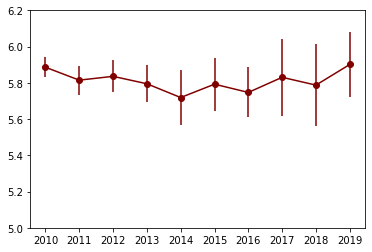

In [28]:
g = plt.errorbar(df["First_Year_In_Model"], df["Training_Error"], yerr= df["Training_SD"], marker='o', color='maroon')
plt.ylim([5,6.2])
plt.show

### Feature and Adjustment Type Subtraction from Best Model Analysis (Hard Court)
Idea here is to subtract out a subset of features and techniques included in the overall model and evaluate the impact on prediction quality. To start, we will do this just for hard court matches.

Feature or Class of Features Removed from Overall Best Model/Training Set Error(SD)/Test Set Error
Hyperparameter-Optimizied Gradient Boosting Model, 2015-2019 included in model (2012-2014 data runway), 20 match threshold per player in a given match

Full model: (5.401037506296505, 0.03880163243608201), 5.384631822640838
No Short-Term Performance Features: (5.407210049694717, 0.04202916314204297), 5.377417973953793
No Player Head-to-Head Past Results Features: (5.408339774982705, 0.04252139807636457), 5.377529968895667 

No Court Speed Proxy Features: (5.4110149902004885, 0.03671822782926413), 5.37771484194196
No Stamina & Fatigue-Related Features: (5.41319234692173, 0.03718808060024765), 5.377951070254706
No SOS Adjustment to Performance Features: (5.428369874780837, 0.039469181678415836), 5.386490495568488


No Rankings-Related Features: (5.435674819791214, 0.04138319111070031), 5.40633748879065
No Long-Term Performance Features: (5.443737627940729, 0.03900717458515713), 5.392688873134082
Rankings-Derived Features Only for Past Player Performance: (5.580519356942332, 0.058416202396981795), 5.557887619412346
No Player Differential Features: (5.726166645451683, 0.06978226294366076), 5.687397468975097
No Decay Weighted Features: (5.414731470033668, 0.04422300680397044), 5.3728295017716805

No Time-Decay Weighting OR SOS Adjustment: (5.434646241989665, 0.03725483869464828), 5.391483007388304


Best Hyperparameters for Full Model at threshold of 20 prior matches for 2015-2019:
{'gradientboostingregressor__learning_rate': 0.06,
 'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__max_features': 6,
 'gradientboostingregressor__n_estimators': 100,
 'simpleimputer__strategy': 'median',
 'standardscaler': StandardScaler()}

In [3]:
#Player Performance Features
data = [["Full_Model", 5.401037506296505, 0.03880163243608201, 5.384631822640838], ["No_Short_Term_Performance_Features", 5.407210049694717, 0.04202916314204297, 5.377417973953793], ["No_Player_H2H", 5.408339774982705, 0.04252139807636457, 5.377529968895667], ["No_Court_Speed_Proxy", 5.4110149902004885, 0.03671822782926413, 5.37771484194196], ["No_Stamina_Fatigue_Features", 5.41319234692173, 0.03718808060024765, 5.377951070254706], ["No_TimeDecay_No_SOS", 5.434646241989665, 0.03725483869464828, 5.391483007388304], ["No_Long_Term_Performance_Features", 5.443737627940729, 0.03900717458515713, 5.392688873134082], ["Only_Rankings_For_Past_Performance", 5.580519356942332, 0.058416202396981795, 5.557887619412346], ["No_Differential_Performance_Features", 5.726166645451683, 0.06978226294366076, 5.687397468975097]]
df = pd.DataFrame(data, columns=["Model_Inclusion", "Training_Error", "Training_SD", "Testing_Error"])
df

,Model_Inclusion,Training_Error,Training_SD,Testing_Error
0,Full_Model,5.401038,0.038802,5.384632
1,No_Short_Term_Performance_Features,5.407210,0.042029,5.377418
2,No_Player_H2H,5.408340,0.042521,5.377530
3,No_Court_Speed_Proxy,5.411015,0.036718,5.377715
4,No_Stamina_Fatigue_Features,5.413192,0.037188,5.377951
5,No_TimeDecay_No_SOS,5.434646,0.037255,5.391483
6,No_Long_Term_Performance_Features,5.443738,0.039007,5.392689
7,Only_Rankings_For_Past_Performance,5.580519,0.058416,5.557888
8,No_Differential_Performance_Features,5.726167,0.069782,5.687397


(5.35, 5.75)

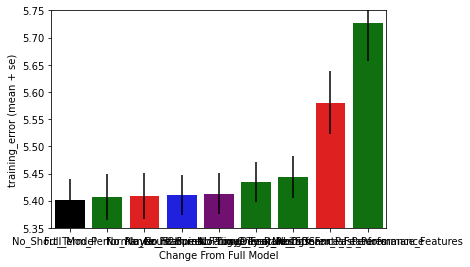

In [6]:
g = sns.barplot(x="Model_Inclusion",y="Training_Error",data=df, palette = ["black","green","red","blue","purple","green","green","red","green"], yerr=df["Training_SD"]*1)
g.set_ylabel("training_error (mean + se)")
#g.set(xticklabels=["", ""])
g.set_xlabel("Change From Full Model")
g.set_ylim(5.35,5.75)

### Model Quality For Clay, Hard, and Combined Figure

2015-2019 data used fo each of the 3 models (2012-2014 for stats accrual "runway")

NOTE: Clay, Hard, and Combined Gradient Boosting Models were run with Hyperparameter Optimization separately done for each of the three versions.  

Hard: 2015-2019: (5.401037506296505, 0.03880163243608201), 5.384631822640838  ((8038, 140), (2680, 140))
Clay: 2015-2019: (5.712890241264851, 0.2327351117042826), 5.9277145808954295  ((3189, 140), (1063, 140))
Combined: 2015-2019: (5.514314950458987, 0.11479205205642107), 5.430222658922351 ((11227, 141), (3743, 141)) t_surf added as a feature for combined analysis

#Best hyperparams for  Hard{'gradientboostingregressor__learning_rate': 0.06,
 'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__max_features': 9,
 'gradientboostingregressor__n_estimators': 100,
 'simpleimputer__strategy': 'median',
 'standardscaler': StandardScaler()}

#Best hyperparams for Clay: 
#{'gradientboostingregressor__learning_rate': 0.05,
 #'gradientboostingregressor__max_depth': 3,
 #'gradientboostingregressor__max_features': 11,
 #'gradientboostingregressor__n_estimators': 100,
 #'simpleimputer__strategy': 'median',
 #'standardscaler': StandardScaler()}

Best hyperparams for Combined model: {'gradientboostingregressor__learning_rate': 0.05,
 'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__max_features': 10,
 'gradientboostingregressor__n_estimators': 120,
 'simpleimputer__strategy': 'median',
 'standardscaler': StandardScaler()}

In [34]:
data = [["Hard_Court", 5.401037506296505, 0.03880163243608201, 5.384631822640838], ["Clay_Court", 5.712890241264851, 0.2327351117042826, 5.9277145808954295], ["All_Surface", 5.514314950458987, 0.11479205205642107, 5.430222658922351]]
df = pd.DataFrame(data, columns=["Model_Surface_Inclusion", "Training_Error", "Training_SD", "Testing_Error"])
df

,Model_Surface_Inclusion,Training_Error,Training_SD,Testing_Error
0,Hard_Court,5.401038,0.038802,5.384632
1,Clay_Court,5.712890,0.232735,5.927715
2,All_Surface,5.514315,0.114792,5.430223


(5.2, 6.0)

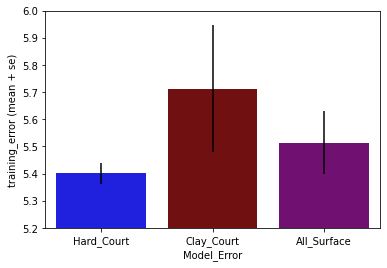

In [37]:
g = sns.barplot(x="Model_Surface_Inclusion",y="Training_Error",data=df, palette = ["blue","maroon","purple"], yerr=df["Training_SD"]*1)
g.set_ylabel("training_error (mean + se)")
#g.set(xticklabels=["", ""])
g.set_xlabel("Model_Error")
g.set_ylim(5.2,6)

### Hard Court Sample Number Randomly Reduced to Same Number as Clay Court Samples
Companion to previous figure, controlling for sample number as an explanation for clay-hard model prediction disparity.

The analysis for this figure was conducted in the workbook "05b_Modeling_ClaySurface-FeatureImportanceAnalysis"

Best Hyperparameters were searched for again for the (randomly) reduced sample size Hard Court-only model, as well as for the new combined model with equal data across the two surfaces. The clay court hyperparameters are the same as in the analysis for the figure above, as it's the same exact sample.   

Hard: 2015-2019: (5.418374449029615, 0.04304493926167511), 5.588966667384873 ((3189, 140), (1063, 140))
Clay: 2015-2019: (5.712890241264851, 0.2327351117042826), 5.9277145808954295  ((3189, 140), (1063, 140))
Combined: 2015-2019: (5.523644645591408, 0.15858898246215716), 5.674027187314122 ((6378, 141), (2126, 141))

Best hyperparams for sample-reduced Hard model:{'gradientboostingregressor__learning_rate': 0.04,
 'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__max_features': 10,
 'gradientboostingregressor__n_estimators': 90,
 'simpleimputer__strategy': 'median',
 'standardscaler': StandardScaler()}

#Best hyperparams for Clay model: 
#{'gradientboostingregressor__learning_rate': 0.05,
 #'gradientboostingregressor__max_depth': 3,
 #'gradientboostingregressor__max_features': 11,
 #'gradientboostingregressor__n_estimators': 100,
 #'simpleimputer__strategy': 'median',
 #'standardscaler': StandardScaler()}

Best hyperparams for Combined Model: {'gradientboostingregressor__learning_rate': 0.04,
 'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__max_features': 11,
 'gradientboostingregressor__n_estimators': 120,
 'simpleimputer__strategy': 'median',
 'standardscaler': StandardScaler()}

In [38]:
data = [["Hard_Court", 5.418374449029615, 0.04304493926167511, 5.588966667384873 ], ["Clay_Court", 5.712890241264851, 0.2327351117042826, 5.9277145808954295], ["All_Surface", 5.523644645591408, 0.15858898246215716, 5.674027187314122]]
df = pd.DataFrame(data, columns=["Model_Surface_Inclusion", "Training_Error", "Training_SD", "Testing_Error"])
df

,Model_Surface_Inclusion,Training_Error,Training_SD,Testing_Error
0,Hard_Court,5.418374,0.043045,5.588967
1,Clay_Court,5.712890,0.232735,5.927715
2,All_Surface,5.523645,0.158589,5.674027


(5.2, 6.0)

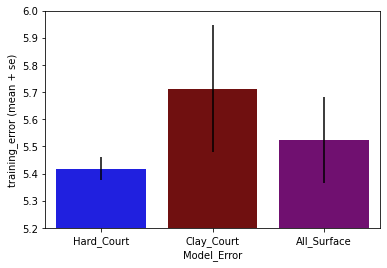

In [39]:
g = sns.barplot(x="Model_Surface_Inclusion",y="Training_Error",data=df, palette = ["blue","maroon","purple"], yerr=df["Training_SD"]*1)
g.set_ylabel("training_error (mean + se)")
#g.set(xticklabels=["", ""])
g.set_xlabel("Model_Error")
g.set_ylim(5.2,6)